In [2]:
import pandas as pd
data=pd.read_csv('data_production')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

<h2>Ajout des features décalées (lagged features)</h2>

<h3>utilité</h3>
<br>
capturent l'historique des données dans un modèle de machine learning ou de deep learning. utilisé dans les tâches de prévision temporelle, car elles permettent au modèle de tenir compte des valeurs passées pour prédire les valeurs futures.

**lag1** capture l'impact immédiat de la période précédente.<br>
**lag2** capture l'impact à moyen terme.<br>
**lag3** permet de modéliser les effets plus lointains, comme des effets saisonniers ou cycliques.

In [4]:
data['lag1'] = data['Production'].shift(1)
data['lag2'] = data['Production'].shift(2)
data['lag3'] = data['Production'].shift(3)


Supprimer les lignes contenants les valeurs manquantes afin d'éviter les erreurs et garantir que les données sont complètes pour l'analyse.

In [5]:
data = data.dropna()

In [6]:
# Prepare data for modeling
X = data.drop(columns=['Production', 'observation_date']) # Remove unnecessary columns
y = data['Production']

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Scale data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3>GridSearchCV</h3><br> permet de tester différentes combinaisons de paramètres pour trouver la meilleure configuration du modèle

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [10]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [11]:
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [12]:
# Predictions using the best model
y_pred_best = best_model.predict(X_test_scaled)


<h1>Évaluer la Précision du Modèle</h1>

In [13]:
# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

In [14]:
print(f"Mean Squared Error (MSE) - Best Model: {mse_best}")
print(f"Root Mean Squared Error (RMSE) - Best Model: {rmse_best}")
print(f"R-squared (R2) - Best Model: {r2_best}")

Mean Squared Error (MSE) - Best Model: 7.864775663784012
Root Mean Squared Error (RMSE) - Best Model: 2.8044207358711373
R-squared (R2) - Best Model: 0.9937111912664847


<h1>Visualisation des Résultats de model</h1>

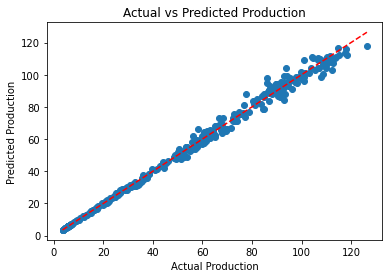

In [17]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted Production")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()



<h1>Évaluer la Capacité Prédictive</h1>

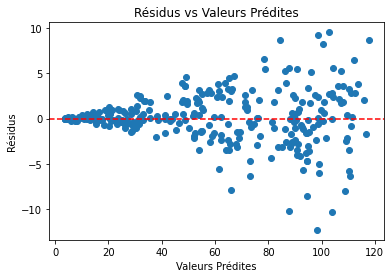

In [22]:
residuals = y_test - y_pred_best

# Graphique des résidus
plt.scatter(y_pred_best, residuals)
plt.xlabel("Valeurs Prédites")
plt.ylabel("Résidus")
plt.title("Résidus vs Valeurs Prédites")
plt.axhline(0, color='red', linestyle='--')
plt.show()
